##  Course project Module 2 for Machine Learning training EPFL Extension School                                 

####  Data source : https://www.kaggle.com/jelaurent/openfoodfacts-exploring-the-dataset/data                                         
####  By Jocker
- started: 09.12.2018
- finished: 05.03.2019

In [1]:
# libraries importing
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import re
from collections import Counter
import math
import calendar
import sqlite3
%matplotlib inline

# Allow to extend the Df display by bypassing the auto adjustment
pd.set_option("display.max_columns",170)
pd.set_option('display.max_rows', 1000)

# A. Importing and cleaning the data

#### You will start by downloading the data from the Kaggle link provided and import it into pandas. You will then need to clean this data using the tools and methods covered in this course. There is not just one correct way to do this. Several solutions will be accepted as long as you demonstrate that you have thoroughly cleaned the data. This includes, of course, dealing with missing values, normalizing entries and text data, dealing with duplicates or incorrect values or getting certain data in more useful formats


## Data importation & first global exploration & rough cleaning¶

#### Data importation and non ASCII character cleaning + comparison with/without  non ASCII

In [2]:
# Fill in the DataFrame from .tsv file using chunks tips & filtering caracter different from ASCII
with open('en.openfoodfacts.org.products.tsv', encoding='ascii', errors='ignore') as infile:
    chunks = pd.read_csv(infile, sep='\t', low_memory=False, chunksize = 10000)
    df = pd.DataFrame()
    df = pd.concat(chunk for chunk in chunks)

In [3]:
# dataset exploration - to know the dataset
df.shape
# Can one says this is big data ??? :) 

(356027, 163)

In [4]:
# dataset exploration - to know the dataset
df.info()
# Fisrt hint here about data type there are a lot of object type (56).
# This is often the case when the columns do not have the correct type.
# Memory usage is huge, but correcting data type can help to reduce it. To be investiguated later.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 445.5+ MB


In [5]:
# Fill in the DataFrame2 from .tsv file using chunks tips
chunks = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False, chunksize = 10000)
df2 = pd.DataFrame()
df2 = pd.concat(chunk for chunk in chunks)

In [6]:
# dataset exploration - to know the dataset
print(df2.shape)
print('')
print(df2.info())

(356027, 163)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 445.5+ MB
None


In [7]:
# dataset exploration - to know the dataset
# Here one can have an idea how many values were removed by th ASCII filtering
(df2.count()-df.count()).sort_values(ascending=False)

countries                                     1624
brands_tags                                    624
brands                                         614
stores                                         333
product_name                                   290
manufacturing_places_tags                       77
manufacturing_places                            77
packaging                                       70
packaging_tags                                  70
purchase_places                                 68
origins                                         49
origins_tags                                    49
generic_name                                    46
categories                                      43
countries_en                                    27
labels                                          20
ingredients_text                                20
allergens                                       14
traces                                          10
quantity                       

### The above ASCII filtring operation is justified face to the value count result

In [8]:
# First global overview of the df
df.head(30)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de bl noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,

In [9]:
# dataset copy - to preserve the original DataFrame
df_Original=df.copy()

## Data set global exploration & cleaning

## ---------------------------------------------- Columns explorer (begin) -----------------------------------------

In [10]:
# dataset exploration - quick view over the columns names
Columns_name=df.columns.values.tolist()
# Add 7 times NaN in the list
for i in range (7):
    Columns_name.append('NaN')

# create the array that matches the screen
array_col=np.array(Columns_name)
a=np.reshape(array_col,(17,10))

# create the new DataFrame based on the pre defined array
df_col=pd.DataFrame(a, columns=(1,2,3,4,5,6,7,8,9,10))
df_col

,1,2,3,4,5,6,7,8,9,10
0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity
1,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places
2,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places
3,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en
4,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n
5,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category
6,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g
7,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g
8,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g
9,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g


## ---------------------------------------------- Columns explorer (end) ------------------------------------------- 

In [11]:
# Check for duplicates -> first look by columns
def check_Dupli(df, *col):
    print ("{0} duplicated rows found in {1} column".format(df.duplicated(col).sum(), col) )

# Automatize the check for all columns
for i in range(len(df.columns)):
    check_Dupli(df,df.columns[i])

178 duplicated rows found in ('code',) column
25 duplicated rows found in ('url',) column
352136 duplicated rows found in ('creator',) column
131104 duplicated rows found in ('created_t',) column
131274 duplicated rows found in ('created_datetime',) column
138875 duplicated rows found in ('last_modified_t',) column
139191 duplicated rows found in ('last_modified_datetime',) column
108180 duplicated rows found in ('product_name',) column
314028 duplicated rows found in ('generic_name',) column
340604 duplicated rows found in ('quantity',) column
339668 duplicated rows found in ('packaging',) column
342608 duplicated rows found in ('packaging_tags',) column
289832 duplicated rows found in ('brands',) column
299916 duplicated rows found in ('brands_tags',) column
313495 duplicated rows found in ('categories',) column
332029 duplicated rows found in ('categories_tags',) column
332017 duplicated rows found in ('categories_en',) column
350818 duplicated rows found in ('origins',) column
3513

356007 duplicated rows found in ('chromium_100g',) column
356015 duplicated rows found in ('molybdenum_100g',) column
355905 duplicated rows found in ('iodine_100g',) column
355976 duplicated rows found in ('caffeine_100g',) column
356006 duplicated rows found in ('taurine_100g',) column
355999 duplicated rows found in ('ph_100g',) column
355675 duplicated rows found in ('fruits-vegetables-nuts_100g',) column
355917 duplicated rows found in ('fruits-vegetables-nuts-estimate_100g',) column
356020 duplicated rows found in ('collagen-meat-protein-ratio_100g',) column
355935 duplicated rows found in ('cocoa_100g',) column
356026 duplicated rows found in ('chlorophyl_100g',) column
355822 duplicated rows found in ('carbon-footprint_100g',) column
355971 duplicated rows found in ('nutrition-score-fr_100g',) column
355971 duplicated rows found in ('nutrition-score-uk_100g',) column
356026 duplicated rows found in ('glycemic-index_100g',) column
356026 duplicated rows found in ('water-hardness

# At that stage duplicates will be dropped only based on general hypothesis

In [12]:
# Check for duplicates rows based on the intrinsic food's attributs (general hypothesis=> same composition = same food ID)
#col=df.columns.tolist()
#col
check_Dupli(df,
 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives_n', 'additives',
'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n',
'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_en',
    'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
    'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g', 'omega-6-fat_100g',
    '-linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g',
    '-fructose_100g', '-lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
    'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g',
    'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g',
    'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g',
    'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g',
    'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
    'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'
 )

62892 duplicated rows found in ('ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_en', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g', '-fructose_100g', '-lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g',

In [13]:
# Remove duplicates rows based on the intrinsic food's attributs
df.drop_duplicates(['ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'additives_n', 'additives',
'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n',
'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_en',
    'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
    'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g', 'omega-6-fat_100g',
    '-linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g',
    '-fructose_100g', '-lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
    'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g',
    'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g',
    'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g',
    'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g',
    'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
    'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'
 ],inplace=True)

In [14]:
# dataset exploration - to know the dataset
# Columns with no value can be droped straight forward
# Columns with a few values (< 30) can be droped straight forward as non statistically significant
df.dropna(thresh=30, axis=1, inplace=True)
df.shape

(293135, 123)

In [15]:
# Dataset exploration - to know the dataset
# Create a function to do several check about the columns of df
def Check_df(df):
    # Check0: if there are any missing values
    check0=df.isnull().sum().sort_values()
    check0=pd.DataFrame(check0,columns=['# missing values'])
    # Check1: if there are any missing values
    check1=(df<0).sum()
    check1=pd.DataFrame(check1,columns=['# values < 0'])
    # Check2: Inspection of the '0' values
    check2=(df==0).sum()
    check2=pd.DataFrame(check2,columns=['# values = 0'])
    # Check3: Inspection of the values between 0&1
    check3=((df<1)^(df<=0)).sum()
    check3=pd.DataFrame(check3,columns=['# 0 < values < 1'])
    # Check4: Inspection of the '0' values
    check4=(df<1).sum()
    check4=pd.DataFrame(check4,columns=['# values < 1'])
    # Display check0,1,2,3,4 results
    df_inspection=pd.concat([check0, check1, check2, check3, check4], axis=1)
    return df_inspection

### Duplicates & low values per columns analysis  have reduced the dataset from (356027, 163) to (293135, 123)

In [16]:
# dataset exploration - to know the dataset
Ratio_r=(1-293135/356027)*100
print("Rows reduction ratio is :", int(Ratio_r), "%")

Ratio_c=(1-123/163)*100
print("Columns reduction ratio is :", int(Ratio_c), "%")

Rows reduction ratio is : 17 %
Columns reduction ratio is : 24 %


In [17]:
# dataset exploration - to know the dataset
# Here it is just a first look as we don't know yet which question we want to reply we will not drop any row yet.
Check_df(df)

,# missing values,# values < 0,# values = 0,# 0 < values < 1,# values < 1
-alpha-linolenic-acid_100g,292935,0,1,154,155
-docosahexaenoic-acid_100g,293046,0,0,54,54
-eicosapentaenoic-acid_100g,293092,0,1,36,37
-fructose_100g,293091,0,4,9,13
-glucose_100g,293103,0,4,16,20
-lactose_100g,292859,0,128,49,177
-linoleic-acid_100g,292977,0,0,100,100
-sucrose_100g,293052,0,8,9,17
additives,27792,293135,0,0,293135
additives_en,131799,293135,0,0,293135


In [18]:
# inspection of Object dtypes columns to verify potential mistakes in dtypes choice
df_dtype_Inspection=df.select_dtypes(include=['object'])
df_dtype_Inspection.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,additives,additives_tags,additives_en,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de bl noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,NaN,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,28 g (0.25 cup),[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,Organic polenta,NaN,NaN,NaN,NaN,35 g (0.25 cup),[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN
5,16100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,NaN,NaN,Unfi,unfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,U

In [19]:
# dataset exploration - to know the dataset
df_dtype_Inspection.describe(include='all')
#df.describe(exclude=[np.number])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,additives,additives_tags,additives_en,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url
count,293109,293109,293134,293132,293125,293135,293135,289285,55346,95351,82208,82208,285743,285730,94414,94429,94451,23278,23242,40071,40065,55520,55616,55640,31269,31265,20147,21753,63275,54777,291895,293040,293018,265395,36730,28260,28243,28268,199594,265343,161336,161336,6550,13933,242001,116759,119161,293109,293109,293109,94429,94423,60369,60369
unique,293020,293109,3100,179289,179193,173345,173166,217478,40950,12898,15699,12900,57864,50227,40108,23033,23045,4972,4488,7644,6992,20619,15425,15425,8895,8567,1655,2674,5518,3397,1316,681,676,238791,16537,9152,3892,3897,25922,228173,39941,39941,14,180,5,14,42,874,874,874,3578,3577,60369,60369
top,70650800367,http://world-en.openfoodfacts.org/product/7613...,usda-ndb-import,1489077002,2017-03-09T16:30:02Z,1439141747,2015-08-09T17:35:47Z,Ice Cream,Ptes alimentaires au bl dur de qualit suprieure,500 g,"Sachet,Plastique","sachet,plastique",Carrefour,carrefour,en:beverages,"en:beverages,en:non-sugared-beverages","Beverages,Non-sugared beverages",France,france,France,france,en:organic,en:organic,Organic,EMB 56251E,emb-56251e,"47.633333,-2.666667",theix-morbihan-france,France,Carrefour,US,en:united-states,United States,Almonds.,bl,Fruits coque,en:nuts,Nuts,240 ml (8 fl oz),[ almonds -> en:almonds ],en:e330,E330 - Citric acid,huile-de-palme,e471-mono-et-diglycerides-d-acides-gras-alimen...,d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:plant-based-foods-and-beverages,Plant-based foods and beverages,http://en.openfoodfacts.org/images/products/60...,http://en.openfoodfacts.org/images/products/06...
freq,3,1,153352,17,17,27,27,403,167,4464,2499,4781,3362,3433,2367,2337,2337,5747,5872,10753,10837,4518,4921,4921,216,216,284,273,13895,6617,153189,155427,155427,154,1440,1610,2482,2482,4699,193,8057,8057,6217,3579,69623,37914,37914,151562,151562,151562,21231,21231,1,1


In [20]:
# dataset exploration - to know the dataset
df.describe(include='all')
# -> 1st constatation: Strange to have Object as dtype for 'code' and strange that statistics in describe give NaN -> To be investiguated more
# -> 2nd constatation: Some minimum values are negative -> that is impossible -> To be investiguated more if part of the specific questions
#df.describe(exclude=[np.number])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,2.931090e+05,293109,293134,2.931320e+05,293125,2.931350e+05,293135,289285,55346,95351,82208,82208,285743,285730,94414,94429,94451,23278,23242,40071,40065,55520,55616,55640,31269,31265,20147,21753,63275,54777,291895,293040,293018,265395,36730,28260,28243,28268,199594,265384.000000,265343,161336,161336,265384.000000,6550,265384.000000,13933,242001,116759,119161,293109,293109,293109,94429,94423,60369,60369,277337.000000,864.000000,2.620820e+05,249685.000000,20320.000000,20359.000000,934.000000,200.000000,43.000000,89.000000,204.000000,158.000000,130710.000000,131609.000000,2.618200e+05,263364.000000,83.000000,32.000000,44.000000,276.000000,288.000000,450.000000,2.080770e+05,2.761340e+05,271895.000000,271851.000000,3922.000000,126340.000000,35.000000,6362.000000,1463.000000,903.000000,129562.000000,10131.000000,9846.000000,10562.000000,6297.000000,4840.000000,2744.000000,4.919000e+03,330.000000,2403.000000,73.000000,99.000000,22166.000000,197.000000,130172.000000,5463.000000,129138.000000,5930.000000,3595.000000,1898.000000,1526.000000,98.000000,1102.000000,287.000000,91.000000,32.000000,49.000000,3223.000000,403.000000,177.000000,1366.000000,276.000000,242001.000000,242001.000000
unique,2.930200e+05,293109,3100,1.792890e+05,179193,1.733450e+05,173166,217478,40950,12898,15699,12900,57864,50227,40108,23033,23045,4972,4488,7644,6992,20619,15425,15425,8895,8567,1655,2674,5518,3397,1316,681,676,238791,16537,9152,3892,3897,25922,NaN,228173,39941,39941,NaN,14,NaN,180,5,14,42,874,874,874,3578,3577,60369,60369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7.065080e+10,http://world-en.openfoodfacts.org/product/7613...,usda-ndb-import,1.489077e+09,2017-03-09T16:30:02Z,1.439142e+09,2015-08-09T17:35:47Z,Ice Cream,Ptes alimentaires au bl dur de qualit suprieure,500 g,"Sachet,Plastique","sachet,plastique",Carrefour,carrefour,en:beverages,"en:bever

# Here are conclusions after the first overview of the dataset from part A.

 - With initially a shape of (356027, 163) one have a big dataset.
 - The first cleaning with ASCII filter was necessary.
 - A first inspection revelated several columns with less than 30 values then they were immediately droped as 30 is a minimum to any statistical conclusion.
 - Based on hypothesis that same aliment have same composition, then a drop of the duplicate in composition has reduced the dataset. The above operations have reduced in average by 20% rows and columns of the dataset.
 - A more deep dive into 'code' column have shown other type of inconsitencies in a column. A in detail check of the type of the elements per column and the column type would maybe allows to reduce the dataset in size. But this operation will be reserved for specific question investiguation.
 - The same steps done till here will be repeated for specific question. But it's important to not drop too many data in the first look.
 - It seems that some rows have been shifted in axis1, mixing columns element, biaising any column statistic at a fisrt look.
 - After such an exercise one bear in mind that sepcific technics to see huge dataset are mandatory.
 - I have now the wish to find or developp a program that will automatically inspect any kind of dataset and summarize the finding to make the DataScientist life easier. (like Open Refine)

# B. Manipulating the data

#### You will work with the data to investigate some properties of your choice. Your goal is to choose 3 interesting questions to answer about the data and perform the necessary steps for the analysis.

#### The questions that you choose must be complex enough to allow for some substantial data manipulation. As a guideline here is a sample topic of analysis

#### Topic: Investigate the macronutrient breakdown across various foods (this is the percentage of calories that come from the 3 macronutrient groups: carbohydrates, protein and fats). What are the foods that have the highest ratios of each macronutrient? What are the foods that are most balanced? What is the macronutrient breakdown across different countries? Can you notice some trends or insights about the data?

#### For each of your 3 questions choose appropriate visual methods to communicate your findings.

## Investiguation topic:
### Investigate the macronutrient breakdown across various foods (this is the percentage of calories that come from the 3 macronutrient groups: carbohydrates, protein and fats).

In [21]:
# Topic data preparation
# 'MacroNut' df is a subset of the main df 'df'
MacroNut=df[['product_name','proteins_100g','carbohydrates_100g','fat_100g', 'countries_en']]
# dataset exploration - to know the dataset
# Here it is just a first look
print(MacroNut.shape)
print(MacroNut.isnull().sum().sort_values())

(293135, 5)
countries_en            117
product_name           3850
proteins_100g         17001
fat_100g              31053
carbohydrates_100g    31315
dtype: int64


In [22]:
# dataset exploration - to know the dataset
# Rows with less than 4 values can be droped straight forward as they will not allow the analysis
MacroNut=MacroNut.dropna(thresh=5, axis=0)
# Verify the effectiveness of dropna function
print(MacroNut.shape)
print(MacroNut.isnull().sum().sort_values())
#MacroNut.head(200)

(256536, 5)
product_name          0
proteins_100g         0
carbohydrates_100g    0
fat_100g              0
countries_en          0
dtype: int64


In [23]:
# Check for duplicates rows
check_Dupli(MacroNut,'product_name','proteins_100g','carbohydrates_100g','fat_100g','countries_en')

21079 duplicated rows found in ('product_name', 'proteins_100g', 'carbohydrates_100g', 'fat_100g', 'countries_en') column


In [24]:
# Remove duplicates rows based on the intrinsic food's attributs
MacroNut.drop_duplicates(['product_name','proteins_100g','carbohydrates_100g','fat_100g'],inplace=True)
# Verify the effectiveness of drop function
print(check_Dupli(MacroNut,'product_name','proteins_100g','carbohydrates_100g','fat_100g'))
print(MacroNut.shape)

0 duplicated rows found in ('product_name', 'proteins_100g', 'carbohydrates_100g', 'fat_100g') column
None
(234880, 5)


In [25]:
# Clean data regarding obvious contextual rules
# Rule 1 each marco nutriment can't overpass 100g
# Create a function that filter all df regarding the range A to B including
def Ranged_A_B(df, A, B):
    for i in range(1,len(df.columns)-1):
        df = df[(df[df.columns[i]]>=A)&(df[df.columns[i]]<=B)]
        #print('In the loop :', df.columns[i], df[df.columns[i]].min(), df[df.columns[i]].max() )
    return df

# Apply the Rule 1
MacroNut=Ranged_A_B(MacroNut, 0, 100)

#print('After the loop')
print('proteins_100g',MacroNut['proteins_100g'].min(), MacroNut['proteins_100g'].max())
print('carbohydrates_100g',MacroNut['carbohydrates_100g'].min(), MacroNut['carbohydrates_100g'].max())
print('fat_100g',MacroNut['fat_100g'].min(), MacroNut['fat_100g'].max())
print(MacroNut.shape)

proteins_100g 0.0 100.0
carbohydrates_100g 0.0 100.0
fat_100g 0.0 100.0
(234860, 5)


In [26]:
# Sort df'Macronut'
MacroNut.sort_values(by=['proteins_100g', 'carbohydrates_100g'], ascending=False, inplace=True)

In [27]:
# Clean data regarding obvious contextual rules
# Rule 2 the sum of proteins, carbohydrates, fat must be max 100g
# Create a function that filter all df regarding 'Sum' column regarding A to B parameters
def Check_Sum(df, A, B):
    # Add the sum in df in Check_Sum
    df['Check_Sum']=df.iloc[:,1]+df.iloc[:,2]+df.iloc[:,3]
    # Apply filter to df
    df = df[(df['Check_Sum']>A)&(df['Check_Sum']<=B)]
    return df

# Apply the Rule 2
MacroNut=Check_Sum(MacroNut,1, 100)
# Verify the effectiveness of Check_Sum function
print(MacroNut.shape)
print(MacroNut.Check_Sum.max())
print(MacroNut.Check_Sum.min())

(226473, 6)
100.0
1.01


In [28]:
# Check for duplicates rows
check_Dupli(MacroNut,'product_name')
# Visual check of the product_name column to have an idea what is inside
MacroNut.sort_values('product_name', ascending=True, inplace=True)
MacroNut

41874 duplicated rows found in ('product_name',) column


,product_name,proteins_100g,carbohydrates_100g,fat_100g,countries_en,Check_Sum
292617,,0.0000,97.000,0.200,Russia,97.2000
281117,,2.4000,8.000,26.000,Russia,36.4000
292914,,1.6000,12.000,0.400,Russia,14.0000
292765,,2.6000,4.700,4.000,Russia,11.3000
292922,,11.5000,66.500,3.300,Russia,81.3000
292243,,0.8000,12.700,0.000,Russia,13.5000
292018,,6.7000,39.800,1.200,Russia,47.7000
292378,,1.3000,2.200,0.500,Russia,4.0000
291779,,3.5000,4.800,3.500,Russia,11.8000
291975,,12.0000,72.000,3.400,Russia,87.4000


In [29]:
# A lot of non useful characters have been seen in product_name. Let's clean that messy data a bit
# Clean the strings
# to lower case all strings
MacroNut['product_name']=MacroNut['product_name'].apply(lambda x: x.lower())
# to remove any ponctuation signs
MacroNut['product_name']=MacroNut['product_name'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
# to remove any digits
MacroNut['product_name']=MacroNut['product_name'].apply(lambda x: x.translate(str.maketrans('','',string.digits)))
# to remove any specific abbreviations relative to food
MacroNut['product_name']=MacroNut['product_name'].str.replace(' mg','').str.replace(' g','').str.replace('quot','')
# to remove any linebreaks (seen as whitespace)
#MacroNut['product_name']=MacroNut['product_name'].apply(lambda x: '\n'.join(x.split()))# do not work
# to remove any suite of spaces
MacroNut['product_name']=MacroNut['product_name'].apply(lambda x: ' '.join(x.split()))

print(MacroNut.shape)
MacroNut.sort_values(by='product_name', ascending=True)

(226473, 6)


,product_name,proteins_100g,carbohydrates_100g,fat_100g,countries_en,Check_Sum
292617,,0.00,97.00,0.200,Russia,97.200
292819,,6.50,44.00,19.000,Russia,69.500
328429,,5.40,59.00,26.000,Russia,90.400
291902,,9.00,62.00,13.000,Russia,84.000
293001,,4.50,14.00,0.500,Russia,19.000
292063,,12.60,68.00,2.600,Russia,83.200
292495,,0.80,1.60,0.100,Russia,2.500
278921,,8.20,28.50,1.200,Russia,37.900
292133,,7.70,56.10,19.500,Russia,83.300
292536,,10.00,69.00,1.000,Russia,80.000


In [30]:
# Reset index of df 'Macronut'
MacroNut.reset_index()

,index,product_name,proteins_100g,carbohydrates_100g,fat_100g,countries_en,Check_Sum
0,292617,,0.0000,97.000,0.200,Russia,97.2000
1,281117,,2.4000,8.000,26.000,Russia,36.4000
2,292914,,1.6000,12.000,0.400,Russia,14.0000
3,292765,,2.6000,4.700,4.000,Russia,11.3000
4,292922,,11.5000,66.500,3.300,Russia,81.3000
5,292243,,0.8000,12.700,0.000,Russia,13.5000
6,292018,,6.7000,39.800,1.200,Russia,47.7000
7,292378,,1.3000,2.200,0.500,Russia,4.0000
8,291779,,3.5000,4.800,3.500,Russia,11.8000
9,291975,,12.0000,72.000,3.400,Russia,87.4000


In [31]:
# Overview of the duplicates
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list(seen_twice)

a=MacroNut['product_name'].values.tolist()
list_duplicates(a)

['',
 'chocolat lait croustillant',
 'pomme pche banane',
 'tiramisuelato',
 'velout aux lgumes varis',
 'sliced pineapple in heavy syrup',
 'organic sour cream',
 'roastedarlic',
 'sandwich slims',
 'star wars candy dispenser',
 'citrons presss',
 'natural almond butter',
 'coconut milk yogurt alternative vanilla',
 'premium chunk light tuna in water',
 'jambon sec italien',
 'fondue moitimoiti',
 'choco softies',
 'fromage blanc au lait de montagne',
 'gaufres au miel',
 'fruit rain',
 'handmade truffles',
 'fromage de tte',
 'fourrs framboises bio',
 'grape fruit spread',
 'chicken tenderloins',
 'kids squeezable pudding',
 'crackers',
 'sauce tomate au basilic',
 'traditionalreek nonfat yogurt',
 'vanilla almond',
 'organic carnaroli rice',
 'french fries',
 'orange juice',
 'premium dried cranberries',
 'creme brulee',
 'chips campagnardes',
 'penne rigate au bl complet',
 'raw hazelnuts',
 'asperges blanches moyennes',
 'ranch dressing mix',
 'cookie dough chocolate chip',
 'ongl

In [32]:
# Check for duplicates rows
# These rows will not be droped but used to calculate the mean or median per product name. Analysis will be done on it.
check_Dupli(MacroNut,'product_name')

52017 duplicated rows found in ('product_name',) column


In [33]:
# Overview of the unique values
def list_uniq(a):
    seen = set()
    uniq = [x for x in a if x not in seen and not seen.add(x)]
    return uniq

a=MacroNut['product_name'].values.tolist()
list_uniq(a)

['',
 'a',
 'avramentotermin',
 'roasted eggplant',
 'classic',
 'villarande',
 'creamy',
 'milka bubbles',
 'vdce',
 'fito',
 'jayeoneun teunteun',
 'bridelight les carrs fondantsot emmental',
 'c',
 'la pina',
 'pergale',
 'salted peanuts',
 'viola',
 'pur jus pomme',
 'marronslacs',
 'carrs fourrs saveur amande',
 'beignet de crevette',
 'activia danone',
 'barre marbre cacao',
 'beef madras',
 'beeren schokoliert',
 'bio cacao maigre',
 'biscuit tablette chocolat au lait bio',
 'boulettes la marocaine et lgumes',
 'bretzels de sils',
 'british free range eggs',
 'brown rice crackers multigrain',
 'calamars la romaine surgels',
 'casino madeleines longues',
 'cerneaux de noix',
 'chunky',
 'clafoutis aux cerises',
 'cocktails dhuiles vierges optiga bio partenaire',
 'confiture allge abricot',
 'coop naturaplan yogourt au lait de brebis framboise',
 'coop qualit prix cervelas fleisch',
 'crac noisettes',
 'creme brle',
 'crmes brles la vanille',
 'diced italian tomatoes',
 'fantaisie

In [34]:
# Clean data regarding obvious contextual rules
# Rule 3 the product name must have at least 2 characters
# Create a function that filter all df regarding 'product_name' column regarding string length >2
def StringLength(df, A):
    # Apply filter to df
    df = df[(df['product_name'].str.len()>A)]
    return df

# Apply the Rule 3
MacroNut=StringLength(MacroNut,2)
# Verify the effectiveness of Check_Sum function
print(MacroNut.shape)
print('string lenght min is:', MacroNut['product_name'].str.len().min())

(225820, 6)
string lenght min is: 3


In [35]:
# Prepare the df to do analysis. Data are grouped by mean as the set of values has to be consistent
MacroNut_mean=MacroNut.groupby(['product_name']).mean()
MacroNut_mean.round(1)

,proteins_100g,carbohydrates_100g,fat_100g,Check_Sum
product_name,,,,
a blend of broccoli carrots cauliflower italian beans zucchini lima beans,1.3,8.0,0.0,9.3
a blend of colby jack monterey jack and cheddar cheese,25.0,3.6,32.1,60.7
a blend of pasteurized process cheddar cheese product with peppers hot habanero,21.4,3.6,32.1,57.1
a boire lin quinoa,2.8,11.9,1.9,16.6
a bubbly probiotic supertea,0.0,3.8,0.0,3.8
a bubbly probiotic tea kombucha,0.0,3.0,0.0,3.0
a bubbly probiotic tea kombucha carrot,0.0,3.0,0.0,3.0
a bubbly probiotics supertea,0.0,3.8,0.0,3.8
a c e t o balsamico dimodena lgp,0.0,20.0,0.0,20.0


# What are the foods that have the highest ratios of each macronutrient?  

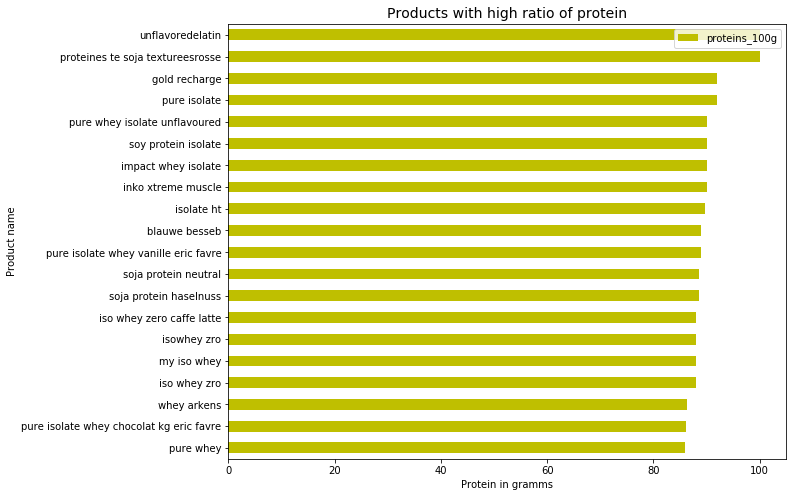

In [36]:
# Plot the bar chart of the 20 first product that have the most protein
plt.figure(figsize=(10,8))
MacroNut_mean.sort_values('proteins_100g', ascending=False, inplace=True)
ax=MacroNut_mean['proteins_100g'][0:20].plot(kind='barh',color='y')
ax.set_title("Products with high ratio of protein",{'fontsize':14})
ax.set_xlabel('Protein in gramms')
ax.set_ylabel('Product name')
ax.invert_yaxis()
ax.legend()
plt.show()

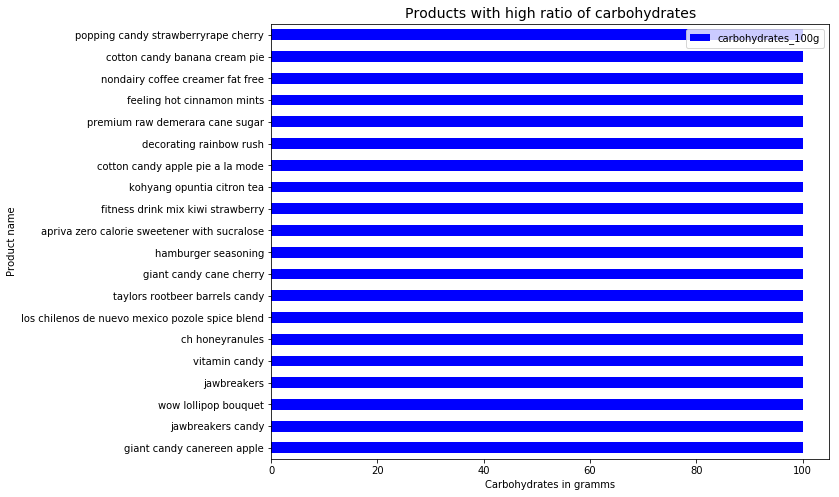

In [37]:
# Plot the bar chart of the 20 first product that have the most carbohydrates
plt.figure(figsize=(10,8))
MacroNut_mean.sort_values('carbohydrates_100g', ascending=False, inplace=True)
ax=MacroNut_mean['carbohydrates_100g'][0:20].plot(kind='barh',color='b')
ax.set_title("Products with high ratio of carbohydrates",{'fontsize':14})
ax.set_xlabel('Carbohydrates in gramms')
ax.set_ylabel('Product name')
ax.invert_yaxis()
ax.legend()
plt.show()

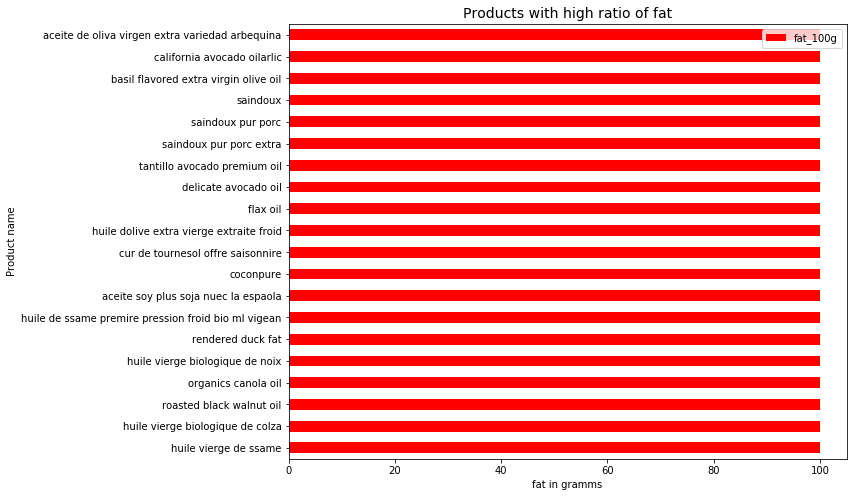

In [38]:
# Plot the bar chart of the 20 first product that have the most fat
plt.figure(figsize=(10,8))
MacroNut_mean.sort_values('fat_100g', ascending=False, inplace=True)
ax=MacroNut_mean['fat_100g'][:20].plot(kind='barh',color='r')
ax.set_title("Products with high ratio of fat",{'fontsize':14})
ax.set_xlabel('fat in gramms')
ax.set_ylabel('Product name')
ax.invert_yaxis()
ax.legend()
plt.show()

# What are the foods that are most balanced? 

Here one must first define better what one means by "most balanced". My vision is that content of subtances are close each to another. For example: Protein 15g, carbohydrates 14g, fat 16g.
I will define it like this:
product who have a small range between their macronutrients. Moreover to distinguish them one will establish the ratio between the mean of the macronutrients and the range.

Here is the algorithm:

 - mean(Protein + carbohydrates + fat),
 - range = max(macronutrient)-min(macronutrient),
 - range/mean -> Balanced product indicator;


In [39]:
# Add the new calculated columns to the df MacroNut
# Calculate the range between the higestand the lowest quantities
MacroNut=MacroNut.assign(Data_range=MacroNut[['proteins_100g', 'carbohydrates_100g', 'fat_100g']].apply(np.max,axis=1)-MacroNut[['proteins_100g', 'carbohydrates_100g', 'fat_100g']].apply(np.min,axis=1))
# Compare the 'Data_range' to the mean, as a ratio to assess the Balanced products
MacroNut=MacroNut.assign(Balanced_Score=100-100*(MacroNut['Data_range']/MacroNut[['proteins_100g', 'carbohydrates_100g', 'fat_100g']].apply(np.mean,axis=1)))
# Display only 1 digit for Balanced_product
MacroNut[['Balanced_Score']]=MacroNut[['Balanced_Score']].applymap(lambda x: round(x,1))

# Here is the answer:

This DataFrame allow us to have a quick look on the balanced products. The columns 'Balanced_Score' get a score of 100% for product with a ratio of 33,33% of each macronutrients.

When the value decrease then the balance quality decreases as well.

The df is sorted by 'Balanced_Score' & 'Data_range'. It's easy to extract the x first most balanced.

In [40]:
# Display the df MacroNut with the new columns to assess the balanced product
MacroNut.sort_values(['Balanced_Score','Data_range'], ascending=[False, True], inplace=True)
print(MacroNut.shape)
MacroNut[['product_name','Balanced_Score','Data_range','proteins_100g','carbohydrates_100g','fat_100g']][0:300]

(225820, 8)


,product_name,Balanced_Score,Data_range,proteins_100g,carbohydrates_100g,fat_100g
235145,alette complte uf emmental jambon,100.0,0.00,12.00,12.00,12.00
205026,l sir pinacoladaiffard,100.0,0.00,1.00,1.00,1.00
202009,colorants alimentaires assortis sainte lucie,100.0,0.00,1.00,1.00,1.00
278839,aaka,100.0,0.00,0.50,0.50,0.50
321065,aliment complet pour chat au poulet au boeuf a...,100.0,0.00,1.00,1.00,1.00
57331,all natural tzatziki cucumberarlic dill,100.0,0.00,7.14,7.14,7.14
28635,amatirciana sauce,100.0,0.00,8.80,8.80,8.80
197486,badoit,100.0,0.00,10.00,10.00,10.00
181732,baguette bio,100.0,0.00,1.00,1.00,1.00
114969,banane cavendish bio,100.0,0.00,1.00,1.00,1.00


## The graph below allow one to see some product at ramdom
- on top the most balanced of the subset

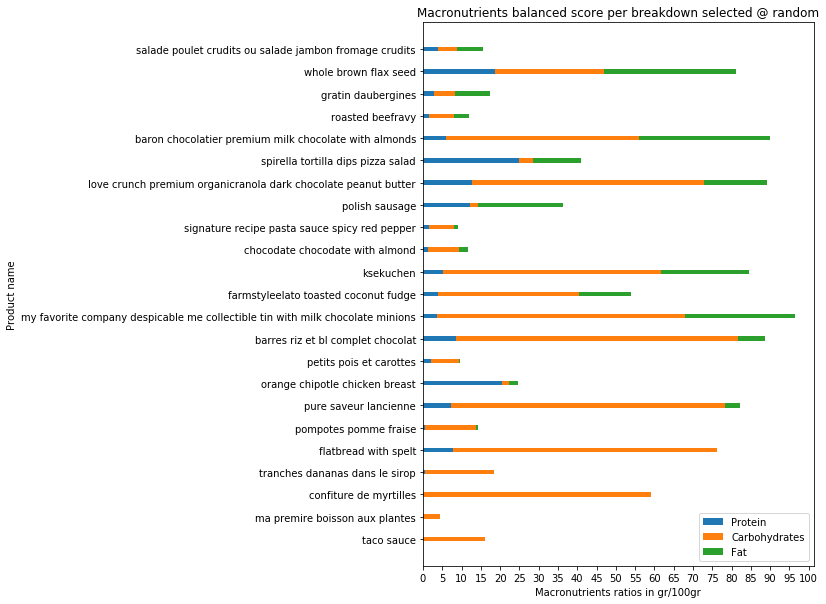

In [41]:
# Display the ratios of macronuriments for random products
# generate staked graphic
n_rows, n_cols=MacroNut.sample(frac=0.0001).shape
N=n_rows
# Sample ramdomly
MacroNut_Balanced=MacroNut.sample(frac=0.0001)
MacroNut_Balanced=MacroNut_Balanced.sort_values('Balanced_Score')

Protein=MacroNut_Balanced[0:N]['proteins_100g']
Carbohydrates=MacroNut_Balanced[0:N]['carbohydrates_100g']
Fat=MacroNut_Balanced[0:N]['fat_100g']

ind = np.arange(N)    # the x locations for the groups
width= 0.2
plt.figure(figsize=(7,10))

p1=plt.barh(ind, Protein, width)
lefts=Protein
p2=plt.barh(ind, Carbohydrates, width, left=lefts)
lefts=lefts + Carbohydrates
p3=plt.barh(ind, Fat, width, left=lefts)

# Arrange graphic
plt.xlabel('Macronutrients ratios in gr/100gr')
plt.ylabel('Product name')
plt.title('Macronutrients balanced score per breakdown selected @ random')
plt.xticks(np.arange(0, 100.1, 5))
plt.yticks(np.arange(N), MacroNut_Balanced['product_name']) 
plt.legend((p1[0], p2[0], p3[0]),('Protein', 'Carbohydrates', 'Fat'))

plt.show()

### To comment on it one can say the balance of the macronutrients from this database cover the full range from well balanced to totaly unbalanced.

 - The best balanced food have a score of 100 (Balanced_product), the worst a negative score.
 
 - Python has an incredible flexibility and makes part of its power. But as a student, I'm a bit lost when to adapt the dataset preprocessing to the graphs technics I know or to search the precise graph technic that can do what I need.  Because, with multivariate dataset graphics technics can become very complex.

# What is the macronutrient breakdown across different countries?

In [42]:
# Overview of the count per country or group of country to select some items with a representative population
# and over more than one continent
MacroNut['countries_en'].value_counts().head(30)

United States                 129100
France                         71147
Switzerland                     7848
Germany                         4428
Spain                           2917
United Kingdom                  1503
France,Switzerland              1253
Belgium                          601
Belgium,France                   582
Italy                            501
Australia                        486
Portugal                         346
France,United Kingdom            335
France,Germany                   261
Sweden                           253
Serbia                           237
Netherlands                      237
France,Spain                     224
France,United States             215
Canada                           207
Germany,Switzerland              189
Hungary                          124
Austria                           93
France,Guadeloupe                 85
Mexico                            79
Denmark                           73
Belgium,France,Switzerland        72
B

In [43]:
# Let's define some investiguations groups : North America, South America, Europe
# Some countries will be grouped to acheive 100 products at least
# North America = United States + Canada
# South America = Mexico + Brazil
# Europe = France + Switzerland + Germany + Spain + United Kingdom

# Filter products that are produced in North America and calculate the mean per macronutrient
MacroNut_USA=MacroNut[MacroNut['countries_en'].isin(['United States','Canada'])]
# Ramdomly select some items to keep the comparaison balanced
MacroNut_USA=MacroNut_USA.sample(frac=0.0015)
MacroNut_USA=MacroNut_USA.mean(axis=0).round(2)
#print('MacroNut_USA:\n', MacroNut_USA)

# Filter products that are produced in Europe and calculate the mean per macronutrient
MacroNut_Europe=MacroNut[MacroNut['countries_en'].isin(['France','Switzerland','Germany','Spain'])]
# Ramdomly select some items to keep the comparaison balanced
MacroNut_Europe=MacroNut_Europe.sample(frac=0.002)
MacroNut_Europe=MacroNut_Europe.mean(axis=0).round(2)
#print('MacroNut_Europe:\n',MacroNut_Europe)

# Filter products that are produced in South America and calculate the mean per macronutrient
MacroNut_South_America=MacroNut[MacroNut['countries_en'].isin(['Mexico','Brazil'])]
MacroNut_South_America=MacroNut_South_America.mean(axis=0).round(2)
#print('MacroNut_South_America:\n', MacroNut_South_America)

In [44]:
# Gather all the above calculation per region in one df 'Macronut_breakdown'
MacroNut_USA=pd.Series(MacroNut_USA, name='MacroNut_USA')
MacroNut_Europe=pd.Series(MacroNut_Europe, name='MacroNut_Europe')
MacroNut_South_America=pd.Series(MacroNut_South_America, name='MacroNut_South_America')
Macronut_breakdown=pd.concat([MacroNut_Europe, MacroNut_South_America, MacroNut_USA], axis=1)
Macronut_breakdown=Macronut_breakdown.T # Transpose it to allows me to reuse my old code to do columns staked graphs
#Macronut_breakdown

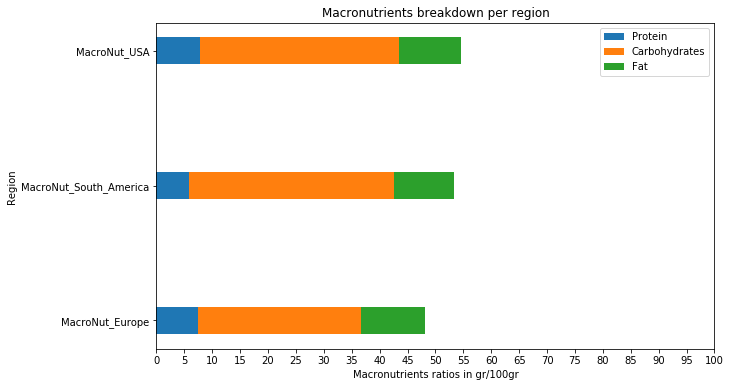

In [45]:
# Display the ratios of macronuriments accros groups
# generate staked graphic
N=3
Protein=Macronut_breakdown[0:N]['proteins_100g']
Carbohydrates=Macronut_breakdown[0:N]['carbohydrates_100g']
Fat=Macronut_breakdown[0:N]['fat_100g']

ind = np.arange(N)    # the x locations for the groups
width= 0.2
plt.figure(figsize=(10,6))

p1=plt.barh(ind, Protein, width)
lefts=Protein
p2=plt.barh(ind, Carbohydrates, width, left=lefts)
lefts=lefts + Carbohydrates
p3=plt.barh(ind, Fat, width, left=lefts)

# Arrange graphic
plt.xlabel('Macronutrients ratios in gr/100gr')
plt.ylabel('Region')
plt.title('Macronutrients breakdown per region')
plt.xticks(np.arange(0, 100.1, 5))
plt.yticks(np.arange(N), Macronut_breakdown.index[0:N]) 
plt.legend((p1[0], p2[0], p3[0]),('Protein', 'Carbohydrates', 'Fat'))

plt.show()

# Can you notice some trends or insights about the data?

- With the study of the product who have the max of one macronutient I noticed that there is too many product having 100g/100g = 100% of one substence. This is a rare situation in reality and then I think for many of these products or the composition data value of the macronutrients are wrong or it's specific product like pure product.
- Another point is that the water content is never indicated. Water content is however an important information.
- A shown in the correlation matrix here below there are only light correlations between macronutrients

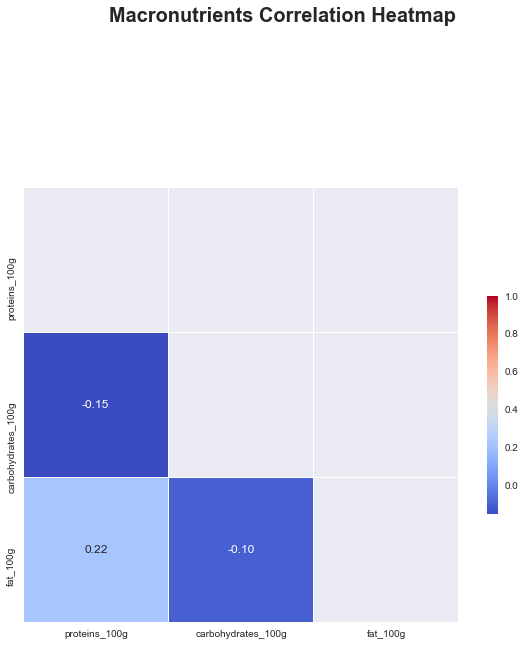

In [84]:
# Define a subset of MacroNut to do correlation matrix inspection
MacroNut2=MacroNut.drop(['product_name','countries_en','Check_Sum','Data_range','Balanced_Score'], axis=1)
# create correlation matrix
corr1= MacroNut2.corr()
# Arrange graph area
fig, (ax) = plt.subplots(1, 1, figsize=(10,10))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Configurate the matrix aspect output
hm = sns.heatmap(corr1, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes
                 cmap="coolwarm", # Color Map
                 square=True,     # If True, set the Axes aspect to “equal” so each cell will be square-shaped
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations
                 linewidths=.05,
                 mask=mask,
                 cbar_kws={"shrink": .5})

fig.subplots_adjust(top=0.73)
fig.suptitle('Macronutrients Correlation Heatmap', fontsize=20, fontweight='bold')

# C. Text data

- You will filter and group your data based on the ingredients_text column. Your goal is to find the five most common ingredients.

In [85]:
# Explore the column and clean it from na
df_ingredient=df.dropna(subset=['ingredients_text'])
print(df_ingredient.shape)
# Create a df from 'ingredients_text' and clean the data
df_ingredient = df_ingredient['ingredients_text'].str.replace('(\W)',',').str.replace(',,,',', ').str.replace(',,',', ')
df_ingredient.head(10)

(265385, 124)


1     Bananas, vegetable,oil, coconut,oil, corn,oil,...
2     Peanuts, wheat,flour, sugar, rice,flour, tapio...
3     Organic,hazelnuts, organic,cashews, organic,wa...
4                                       Organic,polenta
5     Rolled,oats, grape,concentrate, expeller,press...
6                         Organic,long,grain,white,rice
7     Org,oats, org,hemp,granola, org,oats, evaporat...
8     Organic,chocolate,liquor, organic,raw,cane,sug...
9     Organic,expeller,pressed, refined,high,oleic,s...
10                                 Organic,adzuki,beans
Name: ingredients_text, dtype: object

In [86]:
# Create a list of the items delimited by ',' and count them
mylist = df_ingredient.str.split(',').values.tolist()
flattened_mylist = [item for sublist in mylist for item in sublist]
cnt = Counter(flattened_mylist)
# Display the most common items
print(cnt.most_common(10))

[('de', 396428), (' ', 160466), ('', 152771), (' salt', 99128), ('oil', 89311), ('acid', 87064), ('flour', 71897), ('and', 70863), (' sugar', 64985), (' sel', 61441)]


In [87]:
# Clean the list from non product
del cnt['de'];del cnt[' '];del cnt[''];del cnt['and']
print(cnt.most_common(10))

[(' salt', 99128), ('oil', 89311), ('acid', 87064), ('flour', 71897), (' sugar', 64985), (' sel', 61441), (' water', 60017), (' organic', 57929), ('d', 55244), (' natural', 53402)]


# Here is the answer:

- The five most common ingredients are : Salt, Oil, Acid, Flour, Sugar.
- Note the graph below do not account the exact count for each of them as some ingredient were in different languages

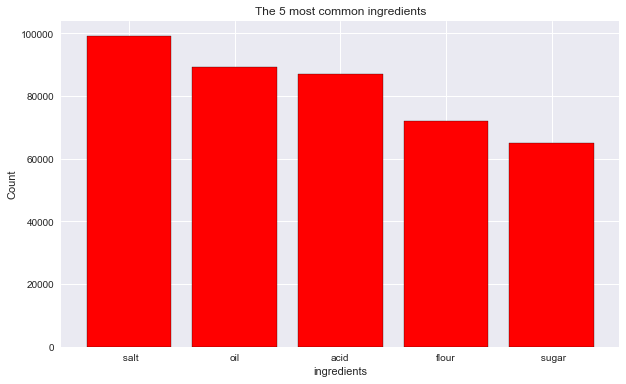

In [88]:
# Generate the plot of the 5 most common ingredients
Five_most_product=cnt.most_common(5)
labels,cnt = zip(*Five_most_product)
x = np.arange(len(labels))

# Arrange graphic
plt.figure(figsize=(10,6))
plt.xlabel('ingredients')
plt.ylabel('Count')
plt.bar(x, cnt, color='r', edgecolor='black')
plt.xticks(x, labels)
plt.title('The 5 most common ingredients')
plt.show()

# D. Time-series analysis

- You will investigate more closely the created_datetime and last_modified_datetime.
- First, you will analyze the mean time difference between these two values.

In [89]:
# dataset exploration - to know the dataset
print(df[['created_datetime','last_modified_datetime']].isnull().sum())
df[['created_datetime','last_modified_datetime']].head(10)

created_datetime          0
last_modified_datetime    0
dtype: int64


,created_datetime,last_modified_datetime
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
2,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
4,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z
5,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z
6,2017-03-09T10:35:30Z,2017-03-09T10:35:30Z
7,2017-03-09T10:35:11Z,2017-03-09T10:35:12Z
8,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z
9,2017-03-09T10:34:14Z,2017-03-09T10:34:14Z


In [90]:
# dataset cleaning
df.dropna(subset=['created_datetime'],axis=0,inplace=True)
df[['created_datetime','last_modified_datetime']].isnull().sum()

created_datetime          0
last_modified_datetime    0
dtype: int64

# Here is the answer:

- The time delta mean is about 117 days, 3h, ...
- However the median would be a better indicator, the median is 0 days

In [91]:
# Mean time delta calculation
# creation of Timestamps
created=pd.to_datetime(df['created_datetime'],errors='coerce')
last_modified=pd.to_datetime(df['last_modified_datetime'],errors='coerce')
# creation of Timedelta
TimeDelta=last_modified-created
print(type(TimeDelta))
# calculation of the mean of Timedelta
TimeDelta_mean=TimeDelta.mean()
print('The timedelta mean is : ', TimeDelta_mean)
TimeDelta_median=TimeDelta.median()
print('The timedelta median is : ', TimeDelta_median)

<class 'pandas.core.series.Series'>
The timedelta mean is :  117 days 03:17:50.813072
The timedelta median is :  0 days 00:00:01


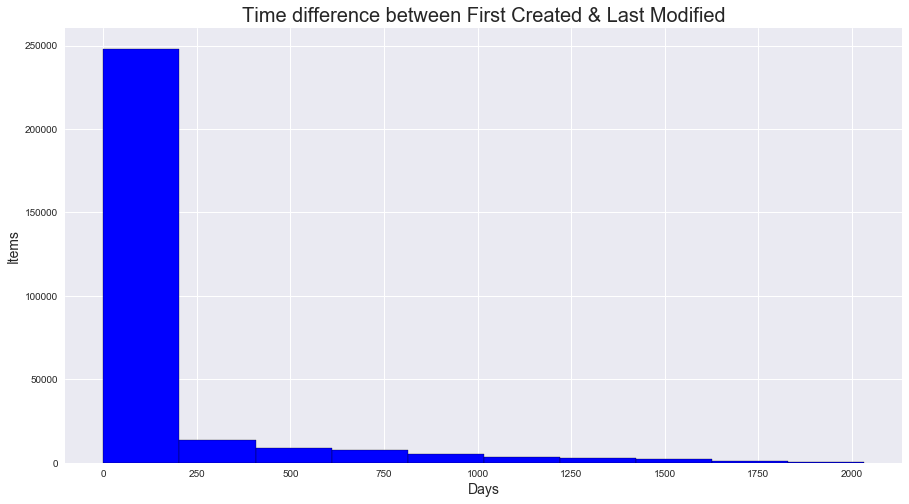

In [92]:
# Generate histogram graphic simpler version
plt.figure(figsize=(15,8))
# Use seaborn for the graph
sns.set()
# creation of Timedelta
TimeDelta2=last_modified-created
# generate histogram
(TimeDelta2/ np.timedelta64(1, 'D')).hist(bins=10, color='b', edgecolor='black')
# Arrange graphic
plt.title('Time difference between First Created & Last Modified',{'fontsize':20})
plt.xlabel('Days',{'fontsize':14})
plt.ylabel('Items',{'fontsize':14})
plt.show()

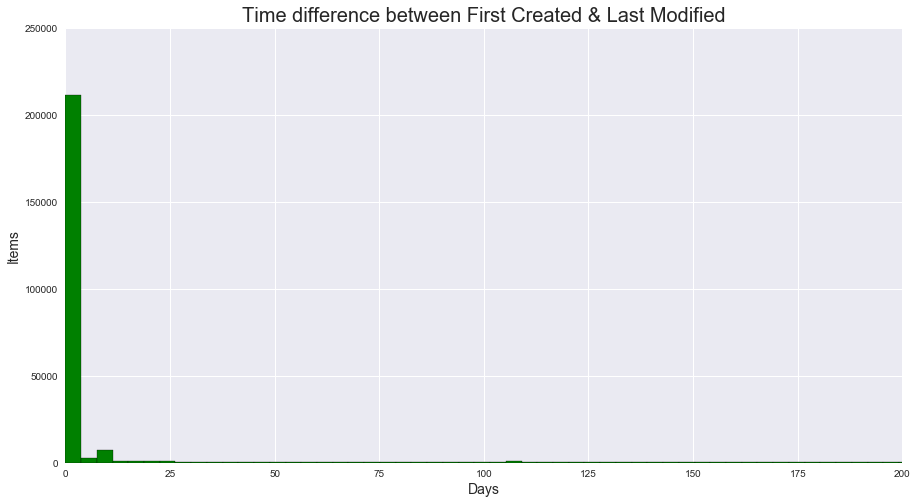

In [93]:
# Generate histogram graphic complex version
plt.figure(figsize=(15,8))
# Use seaborn for the graph
sns.set()
# Calculate the bin size 
n=df[['created_datetime']].count()
bin_size=int(math.sqrt(n))
# creation of Timedelta
TimeDelta2=last_modified-created
# Add a filter
Delta=0
Filter=pd.Timedelta(days=Delta)
TimeDelta3=TimeDelta2[TimeDelta2>=Filter]
# Define graph display area
xticks_min=0; xticks_max=200
yticks_min=0; yticks_max=250000 # 1.1*(int(TimeDelta3.max()/np.timedelta64(1, 'D'))) I wanted to make yticks_max dynamic according to Delta parameter, but it does no work.
plt.axis([xticks_min,xticks_max,yticks_min,yticks_max])
# generate histogram
(TimeDelta3/ np.timedelta64(1, 'D')).hist(bins=bin_size, color='g', edgecolor='black')
# Arrange graphic
plt.title('Time difference between First Created & Last Modified',{'fontsize':20})
plt.xlabel('Days',{'fontsize':14})
plt.ylabel('Items',{'fontsize':14})
plt.show()

##### And second, you will analyze the mean number of created items per month over the timeline of the data. For the second question, you will also choose an appropriate method to visualize your findings.

In [94]:
# Mean items created per month calculation
# creation of Timestamps
df['created'] = pd.to_datetime(df['created_datetime'],errors='coerce')
# calculate the mean per month
Items=(df.set_index('created').resample('M')['product_name'].count())/30

# Here is the answer:

- It seems that a peak in product recording to the databased occrured february and March 2017

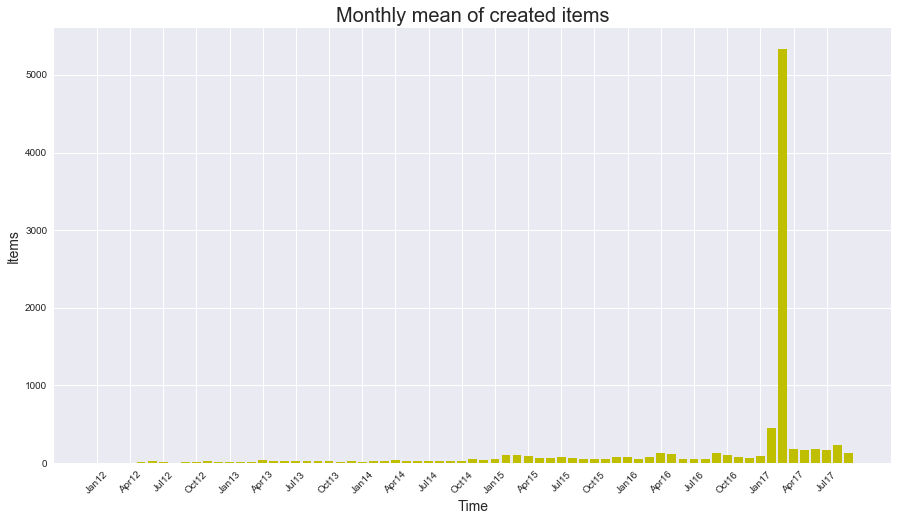

In [95]:
# Generate bar plot graphic
plt.figure(figsize=(15,8))
# Prepare graph range area
#df.sort_values('created_datetime').head(30) # data are from jan 2012 to Setp 2017
x_time = ['Jan12','Feb12','Mar12','Apr12','May12','Jun12','Jul12','Aug12','Sep12','Oct12','Nov12','Dec12',
          'Jan13','Feb13','Mar13','Apr13','May13','Jun13','Jul13','Aug13','Sep13','Oct13','Nov13','Dec13',
          'Jan14','Feb14','Mar14','Apr14','May14','Jun14','Jul14','Aug14','Sep14','Oct14','Nov14','Dec14',
          'Jan15','Feb15','Mar15','Apr15','May15','Jun15','Jul15','Aug15','Sep15','Oct15','Nov15','Dec15',
          'Jan16','Feb16','Mar16','Apr16','May16','Jun16','Jul16','Aug16','Sep16','Oct16','Nov16','Dec16',
          'Jan17','Feb17','Mar17','Apr17','May17','Jun17','Jul17','Aug17','Sep17']
x_ticks = np.arange(69)
# generate bar plot
plt.bar(x_ticks, Items, color='y')
# Arrange graphic
freq=3
plt.xticks(x_ticks[::freq], x_time[::freq], rotation=45)
plt.title('Monthly mean of created items', {'fontsize':20})
plt.xlabel('Time', {'fontsize':14})
plt.ylabel('Items', {'fontsize':14})
plt.show()

# E. Build a database

#### You will build a database to hold your data. It is up to you to define appropriate tables and well as primary keys for connecting them. (The focus is definitely more on just using the basic methods/tools introduced in the course and not on building a complex database.) In particular, you can follow the following list of steps:

 - restrict your data to 1000 entries and 5 columns of your choice
 - create a connection to a sqlite3 database
 - create one or multiple tables, at least one of the tables should have a PRIMARY KEY

In [98]:
# Generate and connect to the database
db = sqlite3.connect('My_Food_database.sqlite')
# Creating a Cursor object from the Connect object db
cursor = db.cursor()
# Create 1st table ('Product')
query = "CREATE TABLE Product (code FLOAT PRIMARY KEY, product_name TEXT, url TEXT);"
cursor.execute(query)
# Create 2nd table ('Nutrition')
query_1 = "CREATE TABLE Nutrition (code FLOAT, energy_100g NUMERIC, sugars_100g NUMERIC);"
cursor.execute(query_1)

 - fill the database with your data

In [99]:
# Prepare data shape and items
df_prod=df.loc[:2000,['code','product_name','url']]
df_nut=df.loc[:2000,['code','energy_100g','sugars_100g']]
# Verify the the shape of the data to fill in the DB
print(df_prod.shape)
print(df_nut.shape)
# Check for duplicates
# Automatize the check for all columns
for i in range(len(df_prod.columns)):
    check_Dupli(df_prod,df_prod.columns[i])  
# Automatize the check for all columns
for i in range(len(df_nut.columns)):
    check_Dupli(df_nut,df_nut.columns[i])

(1749, 3)
(1749, 3)
4 duplicated rows found in ('code',) column
189 duplicated rows found in ('product_name',) column
0 duplicated rows found in ('url',) column
4 duplicated rows found in ('code',) column
1299 duplicated rows found in ('energy_100g',) column
1254 duplicated rows found in ('sugars_100g',) column


 - At this stage one can see duplicates in the PRIMARY KEY that will not work if one do not clean it
 - At this stage one can see duplicates in the product_name as well, this is not nice to have duplicate produt for this example
 - I will clean all duplicate above mentionned

In [100]:
# Remove duplicates rows for PRIMARY KEY and product_name
df_prod.drop_duplicates(['code'],inplace=True)
df_prod.drop_duplicates(['product_name'],inplace=True)
df_nut.drop_duplicates(['code'],inplace=True)
print(df_prod.shape)
print(df_nut.shape)
# Check for duplicates
# Automatize the check for all columns
for i in range(len(df_prod.columns)):
    check_Dupli(df_prod,df_prod.columns[i])  
# Automatize the check for all columns
for i in range(len(df_nut.columns)):
    check_Dupli(df_nut,df_nut.columns[i])
# Prepare data shape and items
df_prod=df_prod.loc[:1285,['code','product_name','url']] # How to be more efficient to restrict to a number without knowing...
df_nut=df_nut.loc[:1166,['code','energy_100g','sugars_100g']] # ...in advance the number of cleaned data that will remain ?
print(df_prod.shape)
print(df_nut.shape)

(1558, 3)
(1745, 3)
0 duplicated rows found in ('code',) column
0 duplicated rows found in ('product_name',) column
0 duplicated rows found in ('url',) column
0 duplicated rows found in ('code',) column
1296 duplicated rows found in ('energy_100g',) column
1251 duplicated rows found in ('sugars_100g',) column
(1000, 3)
(1000, 3)


In [101]:
# Transfer this data into the Database
df_prod.to_sql(name='Product', con=db, if_exists='append', index=False)
df_nut.to_sql(name='Nutrition', con=db, if_exists='append', index=False)

 - run at least one query to demonstrate that it works correctly

In [102]:
# Create a function to run a query
def run_query(query):
    return pd.read_sql_query(query,db)
# Create a query
query_2 ='''
SELECT product_name AS "Product", url AS "Url" FROM Product
LEFT OUTER JOIN Nutrition
ON Product.code = Nutrition.code
WHERE Nutrition.energy_100g > 200.00
ORDER BY energy_100g DESC
LIMIT 15
'''
# Run the query
run_query(query_2)

,Product,Url
0,Ginger Candy Sweetened With Raw Cane,http://world-en.openfoodfacts.org/product/0008...
1,"Bunge, Clear Liquid Soybean Frying Oil",http://world-en.openfoodfacts.org/product/0007...
2,Organic Sunflower Oil,http://world-en.openfoodfacts.org/product/0000...
3,Organic Extra Virgin Olive Oil,http://world-en.openfoodfacts.org/product/0000...
4,Organic Canola Oil Refined,http://world-en.openfoodfacts.org/product/0000...
5,Organic Unrefined Extra Virgin Coconut Oil,http://world-en.openfoodfacts.org/product/0000...
6,100% Pure Canola Oil,http://world-en.openfoodfacts.org/product/0000...
7,"Ventura, Soybean - Peanut Frying Oil Blend",http://world-en.openfoodfacts.org/product/0002...
8,100% Pure Sesame Oil,http://world-en.openfoodfacts.org/product/0008...
9,Sunflower oil,http://world-en.openfoodfacts.org/product/0006...


In [103]:
# Properly close the database
db.close()

# F. Finding correlations

- You will try to find correlations between the different data fields. Your goal is to identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score.

#### Based on my knowledge about nutrition and a some investiguation I found that the nurtitional score of a product is linked to:
(https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/216094/dh_123492.pdf)

- Fats ->'saturated-fat_100g', 'omega-6-fat_100g','trans-fat_100g','polyunsaturated-fat_100g','monounsaturated-fat_100g','omega-3-fat_100g', 'omega-9-fat_100g'
- Sugars -> 'sugars_100g','-sucrose_100g','-glucose_100g','-fructose_100g'
- Energy -> 'energy_100g','energy-from-fat_100g'
- Fruits, vegetables, nuts -> 'fruits-vegetables-nuts_100g','fruits-vegetables-nuts-estimate_100g'
- The macro nutrients -> 'proteins_100g','fat_100g'

#### But one will consider also some other substences such as:

- 'carbohydrates_100g','iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g','potassium_100g','carbon-footprint_100g','cholesterol_100g', 'sodium_100g', 'fiber_100g',	'casein_100g','serum-proteins_100g'	

#### One noticed as well that there are several nutrition indicators in the Db:

- 'nutrition-score-uk_100g', 'nutrition-score-fr_100g'
- 'nutrition_grade_uk', 'nutrition_grade_fr'

#### Then we will look if there are correlations between 4 above metrics to start.

In [104]:
# For data preparation one restart with the almost inital data using the df_Original that have been reserved at the begining
df_Nut_score=df_Original[['product_name','nutrition-score-uk_100g', 'nutrition-score-fr_100g','nutrition_grade_uk', 'nutrition_grade_fr',
                'saturated-fat_100g', 'omega-6-fat_100g','trans-fat_100g','polyunsaturated-fat_100g','monounsaturated-fat_100g',
                'omega-3-fat_100g', 'omega-9-fat_100g','sugars_100g','-sucrose_100g','-glucose_100g','-fructose_100g','energy_100g',
                'energy-from-fat_100g','fruits-vegetables-nuts_100g','fruits-vegetables-nuts-estimate_100g','carbohydrates_100g','proteins_100g','fat_100g','iron_100g',
                'magnesium_100g',  'zinc_100g', 'copper_100g', 'manganese_100g','potassium_100g','carbon-footprint_100g',
                'cholesterol_100g', 'sodium_100g', 'fiber_100g','casein_100g','serum-proteins_100g']].copy()
print(df_Nut_score.shape)
df_Nut_score.head()

(356027, 35)


,product_name,nutrition-score-uk_100g,nutrition-score-fr_100g,nutrition_grade_uk,nutrition_grade_fr,saturated-fat_100g,omega-6-fat_100g,trans-fat_100g,polyunsaturated-fat_100g,monounsaturated-fat_100g,omega-3-fat_100g,omega-9-fat_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,energy_100g,energy-from-fat_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,carbohydrates_100g,proteins_100g,fat_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,potassium_100g,carbon-footprint_100g,cholesterol_100g,sodium_100g,fiber_100g,casein_100g,serum-proteins_100g
0,Farine de bl noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),14.0,14.0,NaN,d,28.57,NaN,0.0,NaN,NaN,NaN,NaN,14.29,NaN,NaN,NaN,2243.0,NaN,NaN,NaN,64.29,3.57,28.57,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,0.018,0.000,3.6,NaN,NaN
2,Peanuts,0.0,0.0,NaN,b,0.00,NaN,0.0,NaN,NaN,NaN,NaN,17.86,NaN,NaN,NaN,1941.0,NaN,NaN,NaN,60.71,17.86,17.86,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.250,7.1,NaN,NaN
3,Organic Salted Nut Mix,12.0,12.0,NaN,d,5.36,NaN,NaN,NaN,NaN,NaN,NaN,3.57,NaN,NaN,NaN,2540.0,NaN,NaN,NaN,17.86,17.86,57.14,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.482,7.1,NaN,NaN
4,Organic Polenta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1552.0,NaN,NaN,NaN,77.14,8.57,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,NaN,NaN


In [105]:
# dataset exploration - to know the dataset
# Check for product_name duplicates only as the other column duplictes may not be relevant
check_Dupli(df_Nut_score,'product_name')

108180 duplicated rows found in ('product_name',) column


In [106]:
# dataset exploration - to know the dataset
# just to see duplicates
c=df_Nut_score['product_name'].values.tolist()
list_duplicates(c)

[nan,
 'Chicken Gravy Mix',
 'Tempeh',
 'Petit Beurre aux Ppites de Chocolat',
 'Dry Roasted Salted Pistachios',
 'Orange Cranberry Scones',
 'Farine de Sarrasin',
 'Mediterranean Sea Salt Grinder',
 'Extra Noodle In Chicken Broth Condensed Soup',
 'Whole Mushrooms',
 'Lupins',
 'Cinnamon Bears',
 'Organic Flax Seed',
 'Spice',
 'Oasis tropical',
 ' 3,2 %',
 'Unsalted Whipped Butter',
 'Instant Oatmeal, Strawberry & Cream',
 'Bacon Wrapped Shrimp',
 'Mche',
 'Fruit Snack',
 'New York Extra Sharp Cheddar Cheese',
 'Pain tranch au seigle',
 'Skyr Aprikose-Sanddornbeere',
 'Mashed Potatoes',
 'Imitation Pasteurized Process Cheese Food',
 'Powdered Bouillon',
 'Black Sesame',
 'Nuss-Nougat-Creme',
 'Zanahoria baby',
 'Mais doux en grains',
 'Breaded Chicken Breast Tenderloins',
 'Magret canard',
 'Raspberry Jam, Raspberry',
 'Emmental rp franais',
 'Assortiment de macarons',
 'Guava Paste',
 'Jumbo Hot Dogs',
 'Green Tea Iced Tea Mix',
 'Biscuit Sandwiches, Bacon, Egg & Cheese',
 'Best Wes

In [107]:
# Remove duplicates rows based on the product_name
df_Nut_score.drop_duplicates(['product_name'],inplace=True)
print(df_Nut_score.shape)

(247847, 35)


In [108]:
# Here it is just a first look as we don't know yet which variable we want to keep we will not drop any row yet.
Check_df(df_Nut_score).sort_values('# missing values')

,# missing values,# values < 0,# values = 0,# 0 < values < 1,# values < 1
product_name,1,247847,0,0,247847
energy_100g,37177,0,6071,12,6083
proteins_100g,37988,2,37420,16207,53629
sodium_100g,40952,0,26126,161680,187806
sugars_100g,47367,4,26885,16724,43613
fat_100g,50163,0,44086,15100,59186
carbohydrates_100g,50415,0,14886,6726,21612
saturated-fat_100g,58079,0,49142,28789,77931
nutrition-score-uk_100g,63845,29285,11470,0,40755
nutrition_grade_fr,63845,247847,0,0,247847


### This above inspection allows me to:

- Drop fully empty columns or rows
- Drop columns or rows with too few items
- To see that nutrition-score-uk_100g has # missing values: 63845,	# values < 0: 29285, # values = 0: 11470		
- To see that nutrition-score-fr_100g has # missing values: 63845,	# values < 0: 27768, # values = 0: 10330

In [109]:
# Df cleaning na
print('df_Nut_score current shape is:',df_Nut_score.shape)
# Df drop rows with full na values
df_Nut_score.dropna(how='all', inplace=True)
# Df drop columns with full na values
df_Nut_score.dropna(axis=1,how='all', inplace=True)
print('df_Nut_score  after  shape is:',df_Nut_score.shape)

df_Nut_score current shape is: (247847, 35)
df_Nut_score  after  shape is: (247846, 34)


In [110]:
# Df drop rows with missing values in 'nutrition-score-uk_100g'
df_Nut_score.dropna(subset=['nutrition-score-uk_100g'], inplace=True)
print('df_Nut_score after shape is:',df_Nut_score.shape)
# Df filter rows with negative values in 'nutrition-score-uk_100g'
df_Nut_score = df_Nut_score[(df_Nut_score['nutrition-score-uk_100g']>=0)]
print('df_Nut_score after shape is:',df_Nut_score.shape)

df_Nut_score after shape is: (184002, 34)
df_Nut_score after shape is: (154717, 34)


In [111]:
# Here it is just a first look as we don't know yet which variable we want to keep we will not drop any row yet.
Check_df(df_Nut_score).sort_values('# missing values')

,# missing values,# values < 0,# values = 0,# 0 < values < 1,# values < 1
nutrition-score-uk_100g,0,0,11470,0,11470
product_name,0,154717,0,0,154717
nutrition_grade_fr,0,154717,0,0,154717
nutrition-score-fr_100g,0,30,10287,0,10317
sugars_100g,162,2,19430,12541,31973
sodium_100g,162,0,13104,126521,139625
saturated-fat_100g,162,0,34551,16819,51370
proteins_100g,162,0,20002,11434,31436
energy_100g,162,0,1606,7,1613
fat_100g,11195,0,21402,8288,29690


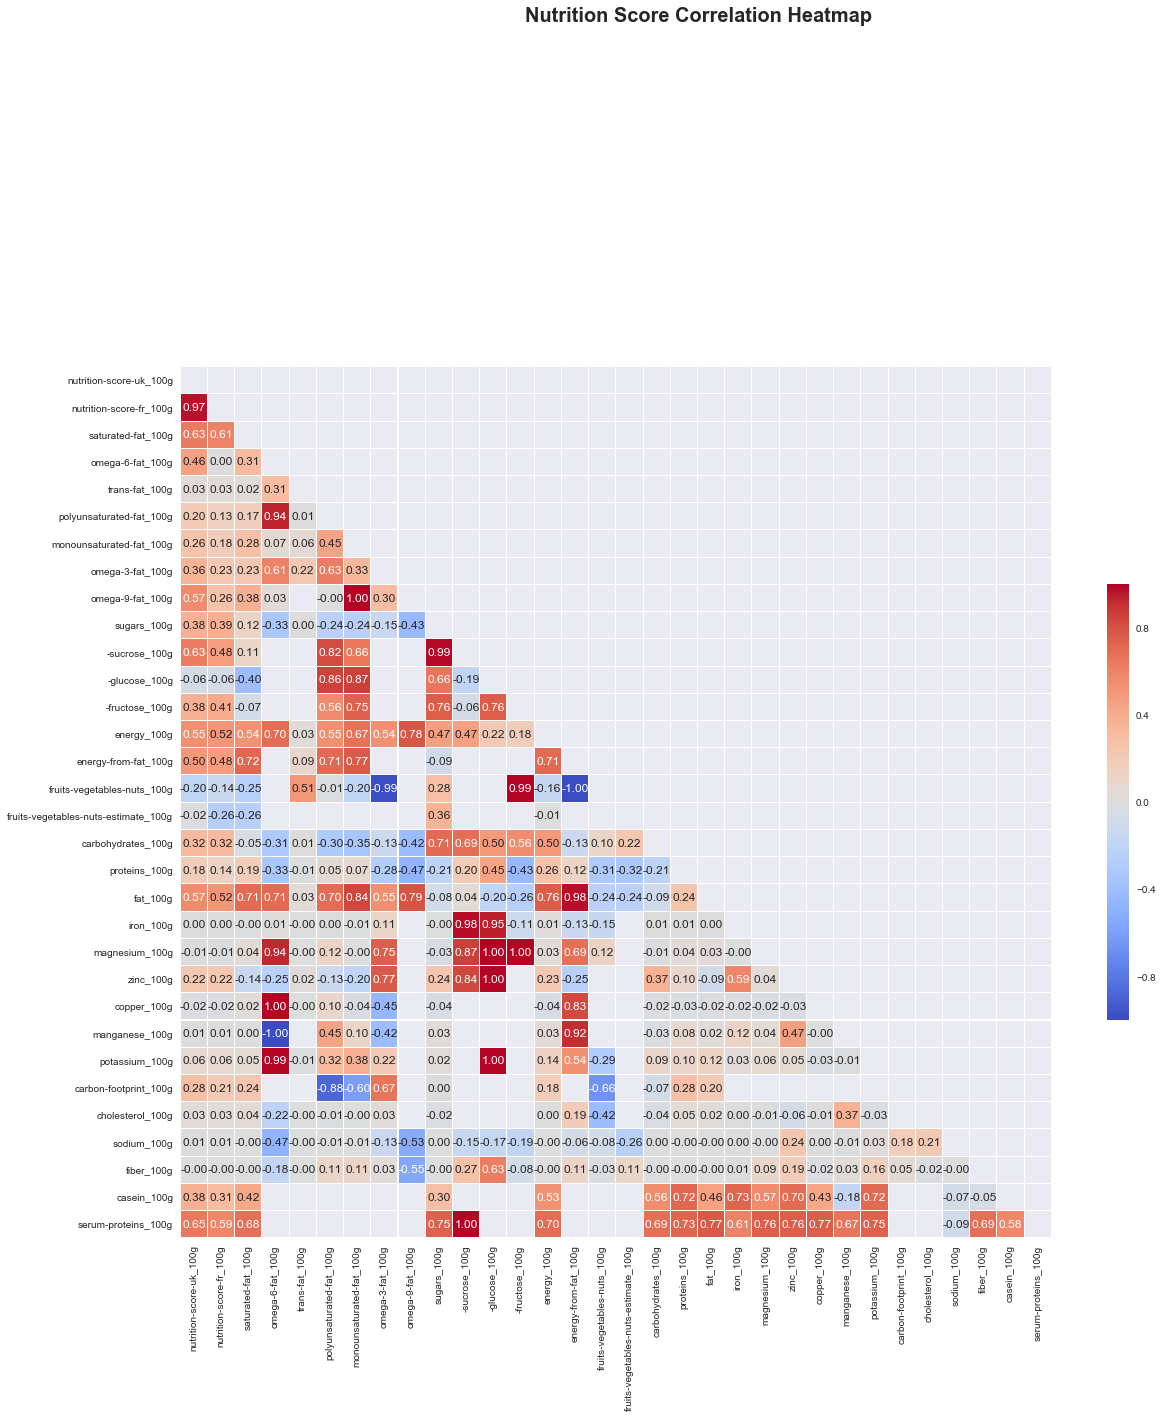

In [112]:
# create first correlation matrix 
corr= df_Nut_score.corr()
# Arrange graph area
fig, (ax) = plt.subplots(1, 1, figsize=(20,20))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Configurate the matrix aspect output
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes
                 cmap="coolwarm", # Color Map
                 square=True,     # If True, set the Axes aspect to “equal” so each cell will be square-shaped
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations
                 linewidths=.05,
                 mask=mask,
                 cbar_kws={"shrink": .5})

fig.subplots_adjust(top=0.73)
fig.suptitle('Nutrition Score Correlation Heatmap', fontsize=20, fontweight='bold')

### This first correlation matrix allows me to:

- See that nutrition-score-uk/-fr_100g are almost the same, with a correlation close to 1. -> I will keep the uk score as reference, https://uk.openfoodfacts.org/nutrition-score-uk

- See some correlations with nutrition-score-uk_100g
- Derive a second correlation matrix
- Affine the data cleaning according to remaining variables and iterate the correlation matrix again

In [113]:
# Define a subset of df_Nut_score based on the first correlation matrix inspection
df_Nut_score2=df_Nut_score.drop(['fruits-vegetables-nuts-estimate_100g','magnesium_100g','potassium_100g','copper_100g',
                                 'manganese_100g','iron_100g','cholesterol_100g','-glucose_100g','trans-fat_100g'], axis=1)

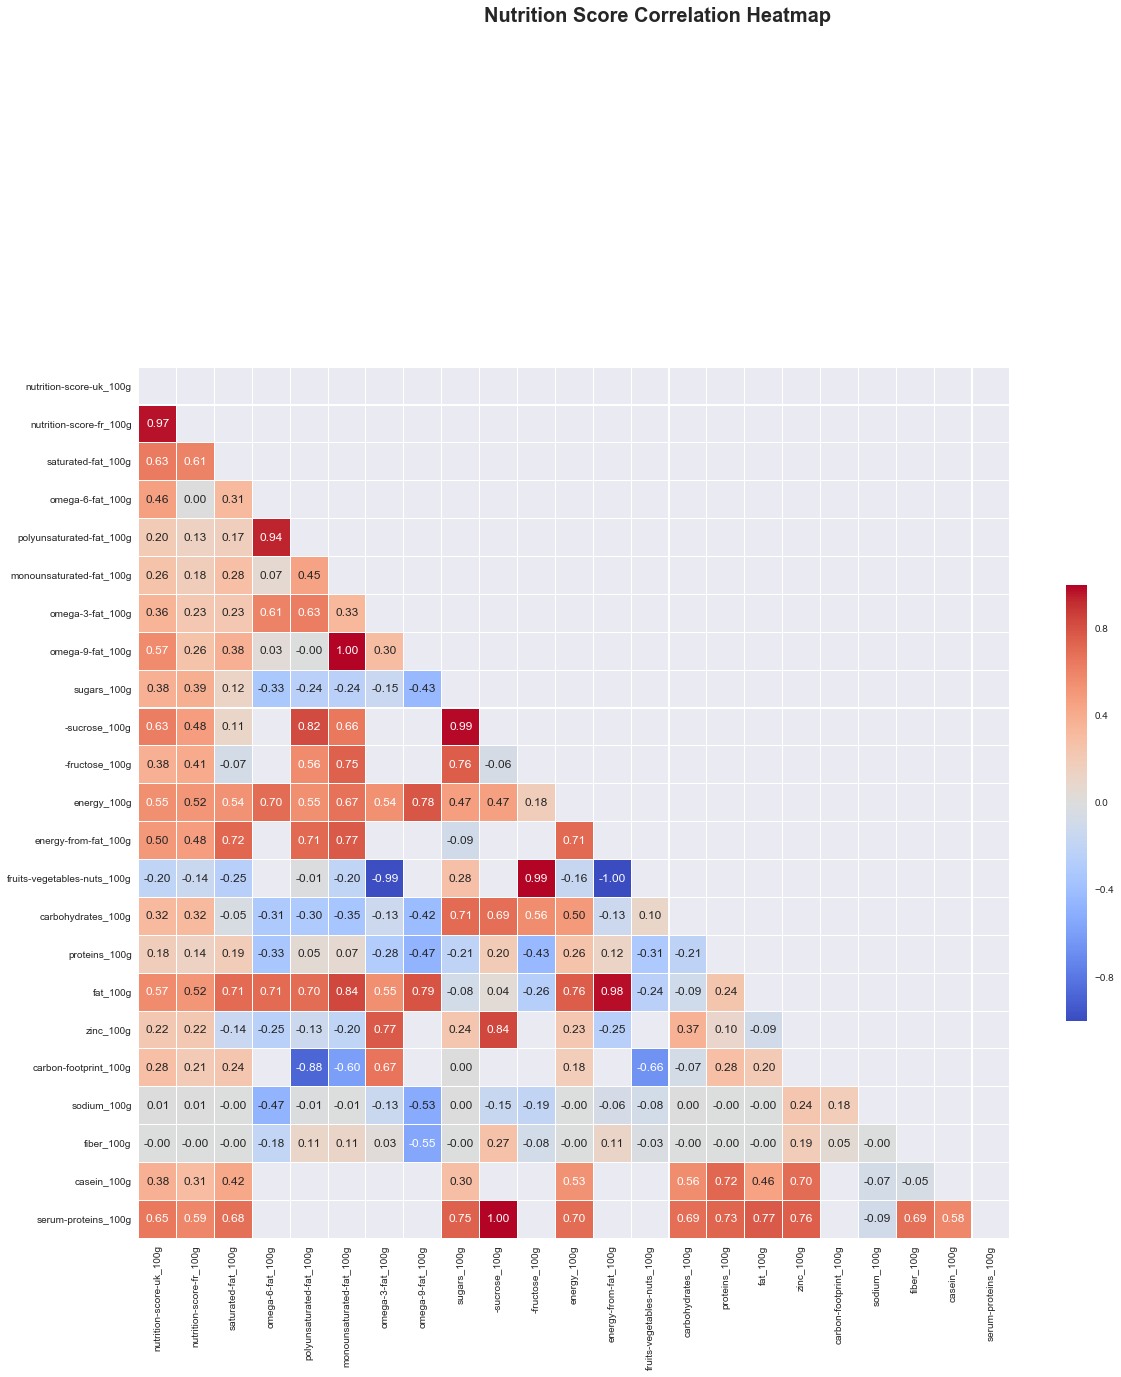

In [114]:
# create 2nd correlation matrix (fine tunned)
corr= df_Nut_score2.corr()
# Arrange graph area
fig, (ax) = plt.subplots(1, 1, figsize=(20,20))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Configurate the matrix aspect output
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes
                 cmap="coolwarm", # Color Map
                 square=True,     # If True, set the Axes aspect to “equal” so each cell will be square-shaped
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations
                 linewidths=.05,
                 mask=mask,
                 cbar_kws={"shrink": .5})

fig.subplots_adjust(top=0.73)
fig.suptitle('Nutrition Score Correlation Heatmap', fontsize=20, fontweight='bold')

In [115]:
type(corr)
corr.iloc[:,0].round(2).sort_values(ascending=False)

nutrition-score-uk_100g        1.00
nutrition-score-fr_100g        0.97
serum-proteins_100g            0.65
-sucrose_100g                  0.63
saturated-fat_100g             0.63
omega-9-fat_100g               0.57
fat_100g                       0.57
energy_100g                    0.55
energy-from-fat_100g           0.50
omega-6-fat_100g               0.46
casein_100g                    0.38
-fructose_100g                 0.38
sugars_100g                    0.38
omega-3-fat_100g               0.36
carbohydrates_100g             0.32
carbon-footprint_100g          0.28
monounsaturated-fat_100g       0.26
zinc_100g                      0.22
polyunsaturated-fat_100g       0.20
proteins_100g                  0.18
sodium_100g                    0.01
fiber_100g                    -0.00
fruits-vegetables-nuts_100g   -0.20
Name: nutrition-score-uk_100g, dtype: float64

### Here one can see the correlation found in the dataset after cleaning.
- A deeper cleaning could still be done, by removing rows who are missing obvious variable of influence
- Some of these variable shall be collinear then a PCA could help to keep only the main ones

### Dear coach, teacher, thank you for your revision of my project course. 
### This project was:
- A heavy cleaning exercise
- I learnt a lot in data cleaning and I think it is crucial to have a good level in it. At the same time it would be nice to get some help from dedicated software to do it.
- I started in december 2018 and just finished in march 2019. I start to be worry concerning the whole training as I'm working at 100% and give all my free time for that training.
- I hope next modules will go faster